In [1018]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1019]:
df = pd.read_csv("./eplmatches.csv")
df.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A


In [1020]:
season_2022 = df[df["Season_End_Year"] == 2022]["Home"].unique()
regulated_teams = df[df["Season_End_Year"] == 2021]["Home"][~df["Home"].isin(season_2022)].unique()
regulated_teams

array(['Fulham', 'West Brom', 'Sheffield Utd'], dtype=object)

In [1021]:
season_2021 = df[df["Season_End_Year"] == 2021]
season_2021_names = df[df["Season_End_Year"] == 2021]["Home"].unique()

In [1022]:
promoted_teams = df[df["Season_End_Year"] == 2022]["Home"][~df["Home"].isin(season_2021_names)].unique()
promoted_teams

array(['Brentford', 'Watford', 'Norwich City'], dtype=object)

In [ ]:
home = pd.DataFrame()
away = pd.DataFrame()

home["team"] = season_2021["Home"]
away["team"] = season_2021["Away"]

home["goals"] = season_2021["HomeGoals"]
away["goals"] = season_2021["AwayGoals"]

teams = home.append(away)
tmp = {
    "team": season_2021["Home"],
    "goals": season_2021["AwayGoals"]*-1,
}
tmp = pd.DataFrame(tmp)

teams = teams.append(tmp, ignore_index=True)

tmp = {
    "team": season_2021["Away"],
    "goals": season_2021["HomeGoals"]*-1,
}
tmp = pd.DataFrame(tmp)

teams = teams.append(tmp, ignore_index=True)

teams

In [1024]:
teams_goals = teams.groupby("team").sum()
teams_goals

,goals
team,
Arsenal,16
Aston Villa,9
Brighton,-6
Burnley,-22
Chelsea,22
Crystal Palace,-25
Everton,-1
Fulham,-26
Leeds United,8


<AxesSubplot:xlabel='team'>

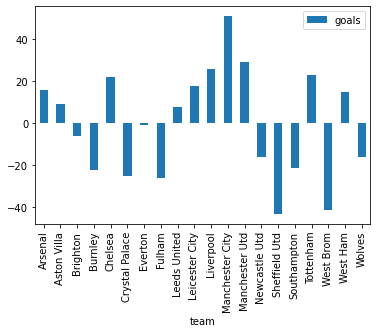

In [1025]:
teams_goals.plot(kind="bar")

In [1026]:
np.floor(teams_goals["goals"].mean())

0.0

<AxesSubplot:xlabel='goals'>

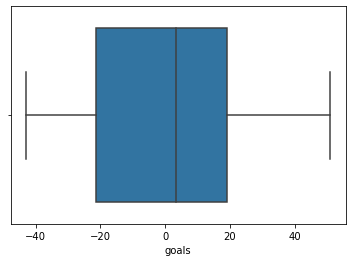

In [1027]:
sns.boxplot(x=teams_goals["goals"])

In [1028]:
teams_goals["goals"].describe()

count    20.000000
mean      0.000000
std      25.532229
min     -43.000000
25%     -21.250000
50%       3.500000
75%      19.000000
max      51.000000
Name: goals, dtype: float64

In [1029]:
quartiles = teams_goals["goals"].quantile([0.25,0.5,0.75])

In [ ]:
score = pd.DataFrame(columns=["Diff"])

for i in range(0, len(teams_goals)):
    if teams_goals.iloc[i].goals < quartiles[0.25]:
        score = score.append({"Diff": 1}, ignore_index=True)
    elif teams_goals.iloc[i].goals < quartiles[0.5]:
        score = score.append({"Diff": 2}, ignore_index=True)
    elif teams_goals.iloc[i].goals < quartiles[0.75]:
        score = score.append({"Diff": 3}, ignore_index=True)
    else:
        score = score.append({"Diff": 4}, ignore_index=True)

In [1031]:
teams_goals["Diff"] = score["Diff"].values
teams_goals

,goals,Diff
team,,
Arsenal,16,3
Aston Villa,9,3
Brighton,-6,2
Burnley,-22,1
Chelsea,22,4
Crystal Palace,-25,1
Everton,-1,2
Fulham,-26,1
Leeds United,8,3


<AxesSubplot:xlabel='team', ylabel='Diff'>

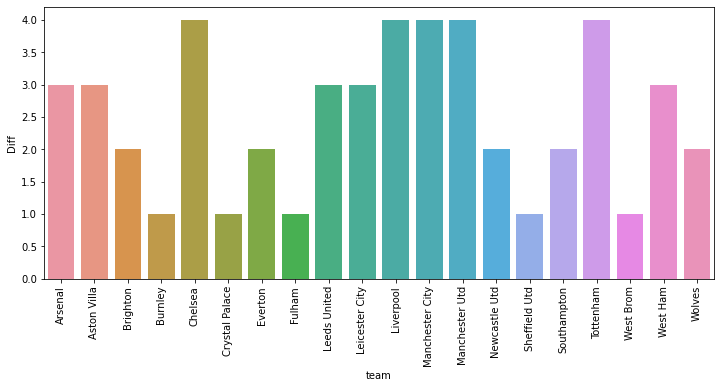

In [1032]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.barplot(x=teams_goals.index, y=teams_goals["Diff"])

In [1033]:
teams_goals[teams_goals.index == "Wolves"]["Diff"][0]

2

In [ ]:
brentford_schedule_home = pd.DataFrame(columns=["Week", "Team", "IsHome", "Diff", "RW", "RD", "RL", "PBW", "PBD", "PBL"])
brentford_schedule_away = pd.DataFrame(columns=["Week", "Team", "IsHome", "Diff", "RW", "RD", "RL", "PBW", "PBD", "PBL"])

brentford_schedule_home["Week"] = df[df["Season_End_Year"] == 2022][df["Home"] == "Brentford"]["Wk"]
brentford_schedule_home["Team"] = df[df["Season_End_Year"] == 2022][df["Home"] == "Brentford"]["Away"]
brentford_schedule_home["IsHome"] = "Home"

brentford_schedule_away["Week"] = df[df["Season_End_Year"] == 2022][df["Away"] == "Brentford"]["Wk"]
brentford_schedule_away["Team"] = df[df["Season_End_Year"] == 2022][df["Away"] == "Brentford"]["Home"]
brentford_schedule_away["IsHome"] = "Away"

brentford_schedule_home

In [1035]:
brentford_schedule_home.reset_index(inplace = True, drop = True)
brentford_schedule_away.reset_index(inplace = True, drop = True)

In [ ]:
for i in range(0, len(brentford_schedule_home)):
    if brentford_schedule_home.iloc[i]["Team"] not in promoted_teams:
        brentford_schedule_home.at[i, 'Diff'] = int(teams_goals[teams_goals.index == brentford_schedule_home.iloc[i]["Team"]]["Diff"][0])

for i in range(0, len(brentford_schedule_away)):
    if brentford_schedule_away.iloc[i]["Team"] not in promoted_teams:
        brentford_schedule_away.at[i, 'Diff'] = int(teams_goals[teams_goals.index == brentford_schedule_away.iloc[i]["Team"]]["Diff"][0])
        # To Be multiplicated by home/away factor (away is harder)
        
brentford_schedule = brentford_schedule_home.append(brentford_schedule_away).sort_values("Week")
missing = brentford_schedule['Diff'].isnull()
brentford_schedule.loc[missing, "Diff"] = 0.5
brentford_schedule

<AxesSubplot:xlabel='Week', ylabel='Diff'>

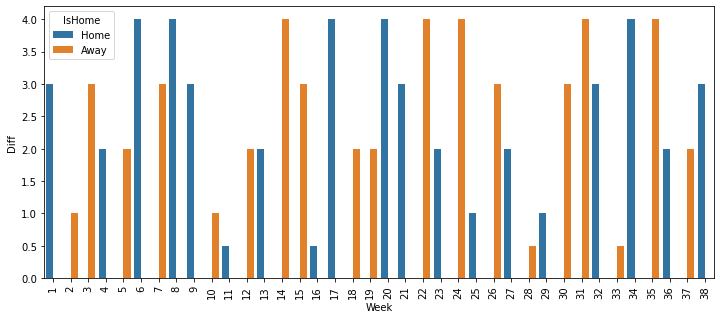

In [1037]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.barplot(x="Week", y="Diff", hue="IsHome", data=brentford_schedule)

In [1038]:
regulated_teams

array(['Fulham', 'West Brom', 'Sheffield Utd'], dtype=object)

In [1039]:
regulated_matches = season_2021[(season_2021["Home"].isin(regulated_teams)) | (season_2021["Away"].isin(regulated_teams))].sort_values("Wk")
regulated_matches

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
10886,2021,1,2020-09-12,Fulham,0,3,Arsenal,A
10890,2021,1,2020-09-13,West Brom,0,3,Leicester City,A
10892,2021,1,2020-09-14,Sheffield Utd,0,2,Wolves,A
11004,2021,2,2020-09-21,Aston Villa,1,0,Sheffield Utd,H
10997,2021,2,2020-09-19,Leeds United,4,3,Fulham,H
...,...,...,...,...,...,...,...,...
11186,2021,37,2021-05-18,Manchester Utd,1,1,Fulham,D
11192,2021,37,2021-05-19,Newcastle Utd,1,0,Sheffield Utd,H
11203,2021,38,2021-05-23,Fulham,0,2,Newcastle Utd,A
11199,2021,38,2021-05-23,Sheffield Utd,1,0,Burnley,H


In [ ]:
regulated_matches[regulated_matches["Home"] == "Arsenal"][regulated_matches["FTR"] == 'H'].count()["Wk"]

In [ ]:
brentford_schedule

In [1042]:
brentford_schedule.reset_index(inplace = True, drop = True)

In [ ]:
for i in range(0, len(brentford_schedule)):
    if brentford_schedule.iloc[i]["Team"] not in promoted_teams:
        rl1 = regulated_matches[regulated_matches["Home"] == brentford_schedule.iloc[i]["Team"]][regulated_matches["FTR"] == 'H'].count()["Wk"]
        rl2 = regulated_matches[regulated_matches["Away"] == brentford_schedule.iloc[i]["Team"]][regulated_matches["FTR"] == 'A'].count()["Wk"]
        brentford_schedule.at[i, 'RL'] = rl1+rl2
        brentford_schedule.at[i, 'PBL'] = (rl1+rl2)/6

        rw1 = regulated_matches[regulated_matches["Home"] == brentford_schedule.iloc[i]["Team"]][regulated_matches["FTR"] == 'A'].count()["Wk"]
        rw2 = regulated_matches[regulated_matches["Away"] == brentford_schedule.iloc[i]["Team"]][regulated_matches["FTR"] == 'H'].count()["Wk"]
        brentford_schedule.at[i, 'RW'] = rw1+rw2
        brentford_schedule.at[i, 'PBW'] = (rw1+rw2)/6

        rd1 = regulated_matches[regulated_matches["Home"] == brentford_schedule.iloc[i]["Team"]][regulated_matches["FTR"] == 'D'].count()["Wk"]
        rd2 = regulated_matches[regulated_matches["Away"] == brentford_schedule.iloc[i]["Team"]][regulated_matches["FTR"] == 'D'].count()["Wk"]
        brentford_schedule.at[i, 'RD'] = rd1+rd2
        brentford_schedule.at[i, 'PBD'] = (rd1+rd2)/6

missing = brentford_schedule['PBL'].isnull()
brentford_schedule.loc[missing, "PBL"] = 0.5

missing = brentford_schedule['PBW'].isnull()
brentford_schedule.loc[missing, "PBW"] = 0.5

missing = brentford_schedule['PBD'].isnull()
brentford_schedule.loc[missing, "PBD"] = 0
brentford_schedule

<AxesSubplot:xlabel='Week', ylabel='PBW'>

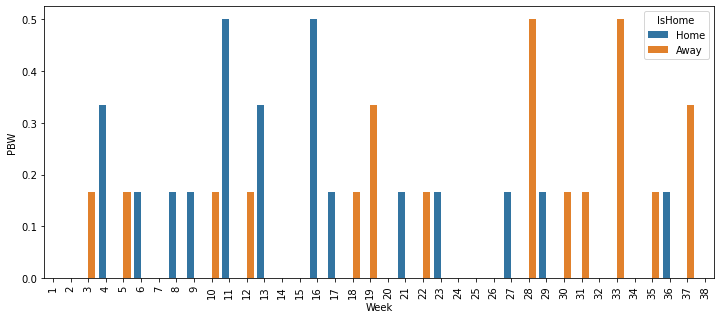

In [1044]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.barplot(x="Week", y="PBW", hue="IsHome", data=brentford_schedule)

<AxesSubplot:xlabel='Week', ylabel='PBD'>

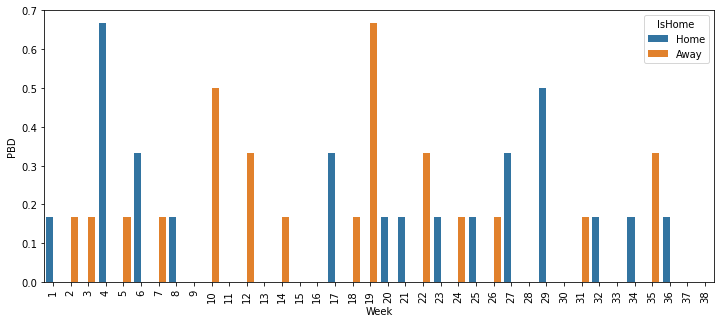

In [1045]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.barplot(x="Week", y="PBD", hue="IsHome", data=brentford_schedule)

<AxesSubplot:xlabel='Week', ylabel='PBL'>

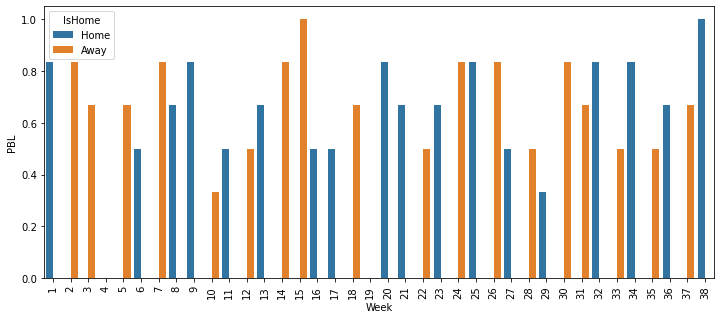

In [1046]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.barplot(x="Week", y="PBL", hue="IsHome", data=brentford_schedule)